# Start

In [ ]:
#!pip install statsmodels
#!pip install seaborn

In [54]:
%matplotlib inline

import os
import h5py
import pandas as pd
import numpy as np

import time

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.proportion import proportion_confint
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras

print("TF  Version",tf.__version__)

TF  Version 2.2.0


In [55]:
# check and set path before loading modules
DIR = "/tf/notebooks/schnemau/xAI_stroke_3d/"
os.chdir(DIR)
print(os.getcwd())
IMG_DIR = "/tf/notebooks/hezo/stroke_perfusion/data/"
OUTPUT_DIR = "/tf/notebooks/schnemau/xAI_stroke_3d/data/"
path_img = IMG_DIR + 'dicom_2d_192x192x3_clean_interpolated_18_02_2021_preprocessed2.h5'
path_tab = IMG_DIR + 'baseline_data_zurich_prepared.csv'

import functions_metrics as fm
import functions_model_definition as md
import functions_read_data as rdat
import pickle as pkl
import functions_model_definition as md
import functions_read_data as rdat
import functions_occlusion as oc
import functions_gradcam as gc
import functions_plot_heatmap as phm
import functions_slider as sl
import Utils_maurice as utils
from keras.utils import to_categorical
# Own functions
from functions.plot_slices import plot_slices
#ontram functions
from k_ontram_functions.ontram import ontram
from k_ontram_functions.ontram_loss import ontram_loss
from k_ontram_functions.ontram_metrics import ontram_acc, ontram_auc
from k_ontram_functions.ontram_predict import predict_ontram, get_parameters
from functions.augmentation3d import zoom, rotate, flip, shift

/tf/notebooks/schnemau/xAI_stroke_3d


# Ontram

In [56]:
which_split = 6

(train_idx, valid_idx, test_idx, X, X_train, X_valid, X_test, X_tab_train, X_tab_valid, X_tab_testt), (Y_train, Y_valid, Y_test), results, results2 = utils.read_and_split_img_data_andrea_maurice2(
    path_img = IMG_DIR + 'dicom_2d_192x192x3_clean_interpolated_18_02_2021_preprocessed2.h5', 
    path_tab = IMG_DIR + 'baseline_data_zurich_prepared.csv', 
    path_splits = '/tf/notebooks/schnemau/xAI_stroke_3d/data/andrea_splits.csv', 
    split = which_split)

Y_train_MRS = to_categorical(Y_train)
Y_valid_MRS = to_categorical(Y_valid)
Y_test_MRS = to_categorical(Y_test)

In [57]:
C = 2
batch_size = 5

## CIB

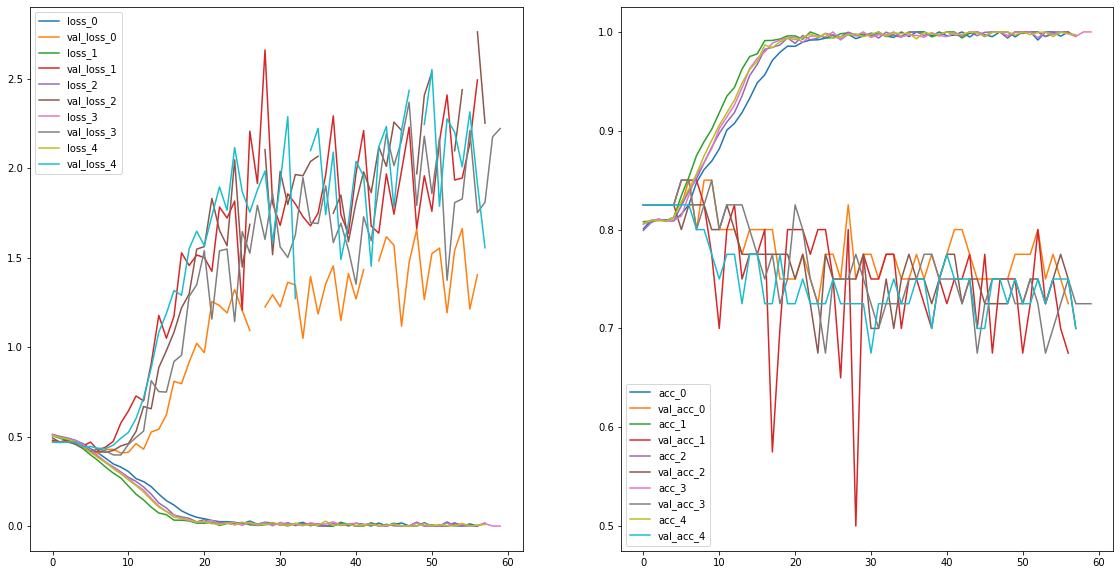

In [58]:
# Create subplots outside the loop
plt.figure(figsize=(30, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)

for i in range(5):
    histplt = pkl.load(open(os.path.join('/tf/notebooks/schnemau/xAI_stroke_3d/data/results_real/hist', f'CIBBB_{i}.pkl'), "rb")) 
    # Plot training history lines
    ax1.plot(histplt['loss'], label=f"loss_{i}")
    ax1.plot(histplt['val_loss'], label=f"val_loss_{i}")
    ax2.plot(histplt['acc'], label=f"acc_{i}")
    ax2.plot(histplt['val_acc'], label=f"val_acc_{i}")

# Add legends and display the plot
ax1.legend()
ax2.legend()
plt.show()

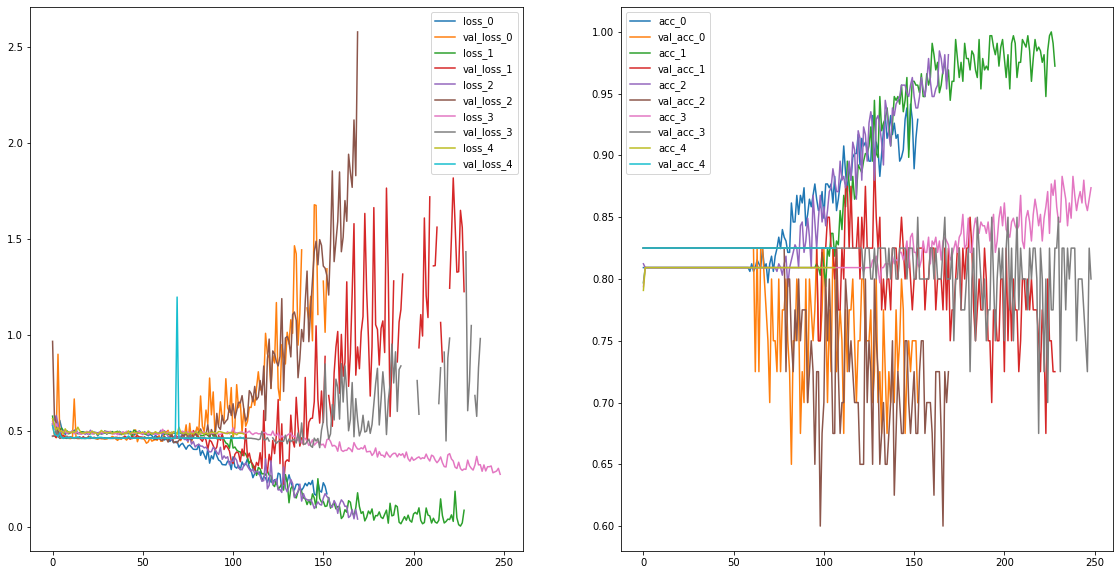

In [59]:
# Create subplots outside the loop
plt.figure(figsize=(30, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)

for i in range(5):
    histplt = pkl.load(open(os.path.join('/tf/notebooks/schnemau/xAI_stroke_3d/data/results_real/hist', f'CIB_{i}_2.pkl'), "rb")) 



    # Plot training history lines
    ax1.plot(histplt['loss'], label=f"loss_{i}")
    ax1.plot(histplt['val_loss'], label=f"val_loss_{i}")
    ax2.plot(histplt['acc'], label=f"acc_{i}")
    ax2.plot(histplt['val_acc'], label=f"val_acc_{i}")

# Add legends and display the plot
ax1.legend()
ax2.legend()
plt.show()

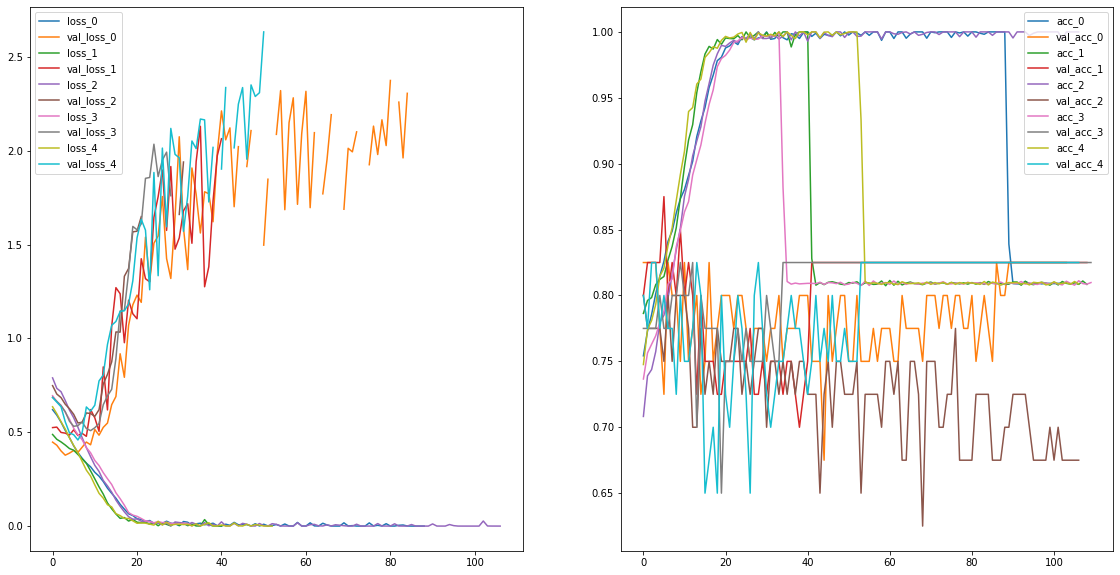

0.458942174911499

In [60]:
# Create subplots outside the loop
plt.figure(figsize=(30, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)

for i in range(5):
    histplt = pkl.load(open(os.path.join('/tf/notebooks/schnemau/xAI_stroke_3d/data/results_real/hist', f'CIB_LSX_{i}.pkl'), "rb")) 
    # Plot training history lines
    ax1.plot(histplt['loss'], label=f"loss_{i}")
    ax1.plot(histplt['val_loss'], label=f"val_loss_{i}")
    ax2.plot(histplt['acc'], label=f"acc_{i}")
    ax2.plot(histplt['val_acc'], label=f"val_acc_{i}")

# Add legends and display the plot
ax1.legend()
ax2.legend()
plt.show()
min(histplt['val_loss'])


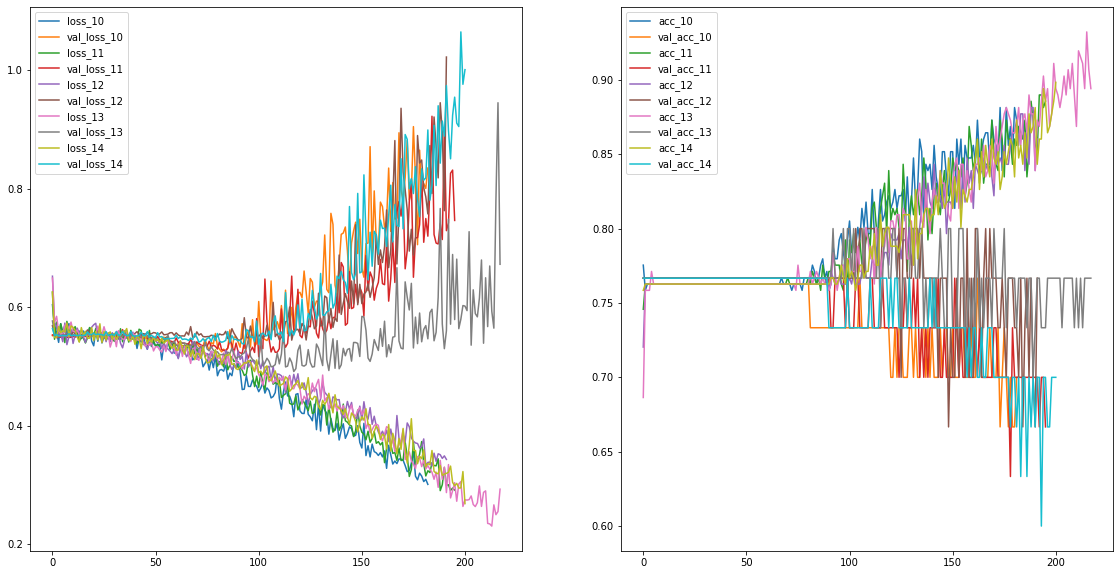

0.5370950698852539

In [61]:
# Create subplots outside the loop
plt.figure(figsize=(30, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)

for i in range(10,15):
    histplt = pkl.load(open(os.path.join('/tf/notebooks/schnemau/xAI_stroke_3d/weights/10Fold_sigmoid_V3', f'hist_3d_cnn_binary_model_split6_unnormalized_avg_layer_paper_model_sigmoid_activation_{i}.pkl'), "rb")) 
    # Plot training history lines
    ax1.plot(histplt['loss'], label=f"loss_{i}")
    ax1.plot(histplt['val_loss'], label=f"val_loss_{i}")
    ax2.plot(histplt['acc'], label=f"acc_{i}")
    ax2.plot(histplt['val_acc'], label=f"val_acc_{i}")

# Add legends and display the plot
ax1.legend()
ax2.legend()
plt.show()
min(histplt['val_loss'])

In [67]:
Y_test_MRS

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [68]:
model_ontram = ontram(utils.img_model_linear_final(np.expand_dims(X_train, axis = -1).shape[1:], 1))
model_ontram.compile(optimizer=keras.optimizers.Adam(),
                                loss=ontram_loss(C, batch_size),
                                metrics=[ontram_acc(C, batch_size)]) 
model_ontram.load_weights('/tf/notebooks/schnemau/xAI_stroke_3d/data/results_real/CIB_1_2.h5')

In [69]:
y_test = predict_ontram(model_ontram, data = (np.expand_dims(X_test, axis = -1)[:40], Y_test_MRS[:40]))

In [72]:
y_test['cdf']

array([[0.        , 0.99995637, 1.        ],
       [0.        , 0.9860123 , 1.        ],
       [0.        , 0.9972103 , 1.        ],
       [0.        , 0.16627598, 1.        ],
       [0.        , 1.        , 1.        ],
       [0.        , 0.36852673, 1.        ],
       [0.        , 0.9769676 , 1.        ],
       [0.        , 0.89059794, 1.        ],
       [0.        , 0.97950715, 1.        ],
       [0.        , 0.9958961 , 1.        ],
       [0.        , 1.        , 1.        ],
       [0.        , 0.99997795, 1.        ],
       [0.        , 0.4094263 , 1.        ],
       [0.        , 0.999961  , 1.        ],
       [0.        , 0.9982017 , 1.        ],
       [0.        , 0.81002593, 1.        ],
       [0.        , 0.99999523, 1.        ],
       [0.        , 0.99887353, 1.        ],
       [0.        , 0.9971917 , 1.        ],
       [0.        , 0.99999607, 1.        ],
       [0.        , 0.31195283, 1.        ],
       [0.        , 0.9998983 , 1.        ],
       [0.

In [51]:
np.argmax(Y_test_MRS, axis = 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [44]:
y_test['pdf']

array([[0.98260534, 0.01739466],
       [0.9681843 , 0.03181571],
       [0.87560916, 0.12439084],
       [0.8592524 , 0.1407476 ],
       [0.98410356, 0.01589644],
       [0.66592973, 0.33407027],
       [0.9097484 , 0.09025162],
       [0.91106665, 0.08893335],
       [0.96124464, 0.03875536],
       [0.9353644 , 0.06463557],
       [0.97194564, 0.02805436],
       [0.87251836, 0.12748164],
       [0.870705  , 0.12929499],
       [0.9553072 , 0.04469281],
       [0.7159273 , 0.2840727 ],
       [0.82402426, 0.17597574],
       [0.97866726, 0.02133274],
       [0.63989526, 0.36010474],
       [0.7762517 , 0.22374833],
       [0.9906723 , 0.00932771],
       [0.62618494, 0.37381506],
       [0.94684136, 0.05315864],
       [0.9882691 , 0.01173091],
       [0.96063006, 0.03936994],
       [0.9436532 , 0.05634677],
       [0.8420596 , 0.15794039],
       [0.7109998 , 0.2890002 ],
       [0.9213306 , 0.07866943],
       [0.8957937 , 0.10420632],
       [0.9348256 , 0.0651744 ],
       [0.

In [73]:
utils.sigmoid(model_ontram.predict(np.expand_dims(X_train, axis = -1)))

array([[9.9974126e-01],
       [9.9999809e-01],
       [9.9451041e-01],
       [9.9297273e-01],
       [4.4679022e-01],
       [4.9638650e-01],
       [1.0000000e+00],
       [9.9866641e-01],
       [9.9763823e-01],
       [9.9449629e-01],
       [1.0000000e+00],
       [1.5749915e-02],
       [9.9987113e-01],
       [9.9994791e-01],
       [7.2090900e-01],
       [9.9998927e-01],
       [9.9777204e-01],
       [9.9997509e-01],
       [9.9609452e-01],
       [8.0078667e-01],
       [9.2583781e-01],
       [9.9996376e-01],
       [9.7992992e-01],
       [6.8873006e-01],
       [9.7327155e-01],
       [9.9990606e-01],
       [9.9999964e-01],
       [4.8911851e-02],
       [9.9999821e-01],
       [9.1014348e-02],
       [9.9837792e-01],
       [1.0000000e+00],
       [1.2143422e-01],
       [7.7584666e-01],
       [9.9992561e-01],
       [9.9999356e-01],
       [1.8380214e-01],
       [1.0000000e+00],
       [3.2984364e-01],
       [9.9999893e-01],
       [9.9155092e-01],
       [9.926517

In [25]:
from k_ontram_functions.utils import to_theta
from k_ontram_functions.ontram_loss import nll

x = X_test
y_true = Y_test_MRS
y_pred = model_ontram.predict(x)

In [28]:
batch_size = y_true.shape[0]
batch_size #41
C = y_true.shape[1] #2


array([[3.7075505 ],
       [2.85317   ],
       [1.7287195 ],
       [1.2764972 ],
       [3.6989229 ],
       [0.6716749 ],
       [1.363478  ],
       [1.7650347 ],
       [2.837927  ],
       [2.1305258 ],
       [1.1889361 ],
       [1.5190389 ],
       [1.4273915 ],
       [2.9789379 ],
       [0.6625466 ],
       [0.877558  ],
       [4.0668793 ],
       [0.7394514 ],
       [1.50526   ],
       [4.3902645 ],
       [0.18876398],
       [3.049995  ],
       [3.7958639 ],
       [2.8949265 ],
       [2.0764475 ],
       [0.6150217 ],
       [0.4087975 ],
       [2.0963936 ],
       [1.7368287 ],
       [2.549351  ],
       [1.1339651 ],
       [1.7884089 ],
       [0.2450256 ],
       [3.8319488 ],
       [1.7167499 ],
       [1.6463412 ],
       [1.3385924 ],
       [1.6323907 ],
       [2.6346254 ],
       [3.5424218 ],
       [2.189676  ]], dtype=float32)

In [35]:
mod_baseline_pred = y_pred[:, :(C - 1)]
mod_baseline_pred = to_theta(mod_baseline_pred, batch_size)
mod_shift_pred = y_pred[:, (C - 1):]

In [41]:
cdf = tf.sigmoid(mod_baseline_pred)
pdf = cdf[:, 1:] - cdf[:, :-1]

In [43]:
cdf

<tf.Tensor: shape=(41, 3), dtype=float32, numpy=
array([[0.        , 0.9760501 , 1.        ],
       [0.        , 0.94548225, 1.        ],
       [0.        , 0.8492485 , 1.        ],
       [0.        , 0.78185296, 1.        ],
       [0.        , 0.97584766, 1.        ],
       [0.        , 0.6618781 , 1.        ],
       [0.        , 0.7963243 , 1.        ],
       [0.        , 0.8538391 , 1.        ],
       [0.        , 0.94469124, 1.        ],
       [0.        , 0.89383495, 1.        ],
       [0.        , 0.7665508 , 1.        ],
       [0.        , 0.82039696, 1.        ],
       [0.        , 0.80649453, 1.        ],
       [0.        , 0.9516135 , 1.        ],
       [0.        , 0.65983224, 1.        ],
       [0.        , 0.70631593, 1.        ],
       [0.        , 0.9831578 , 1.        ],
       [0.        , 0.6768759 , 1.        ],
       [0.        , 0.81835765, 1.        ],
       [0.        , 0.9877544 , 1.        ],
       [0.        , 0.54705137, 1.        ],
      

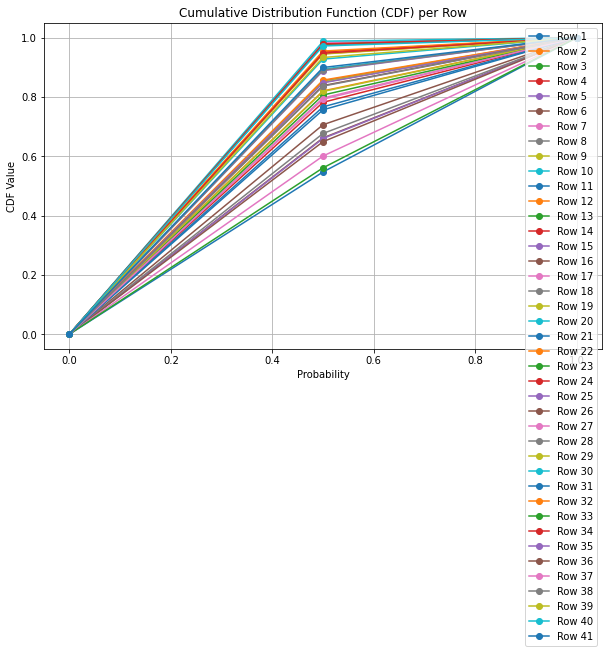

In [45]:
# Extracting columns for plotting
x = np.linspace(0, 1, num=data.shape[1])  # X-axis values from 0 to 1
plt.figure(figsize=(10, 6))

# Plot CDF per row and overlay the lines
for i in range(data.shape[0]):
    plt.plot(x, data[i, :], marker='o', linestyle='-', label=f'Row {i + 1}')
    
plt.xlabel('Probability')
plt.ylabel('CDF Value')
plt.title('Cumulative Distribution Function (CDF) per Row')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
    if(mod_shift_pred.shape[1] == 0):
        cdf = tf.sigmoid(mod_baseline_pred)
    else:
        cdf = tf.sigmoid(mod_baseline_pred - mod_shift_pred)
    pdf = cdf[:, 1:] - cdf[:, :-1]
    pred_class = tf.argmax(pdf, axis = 1)
    nll_ = nll(y_true, y_pred, C, batch_size)
    return {"cdf": cdf.numpy(), "pdf": pdf.numpy(), "pred_class": pred_class.numpy(), "nll": nll_.numpy()}

In [ ]:
def predict_ontram(mod, data):
    # data = tuple or tf dataset
    if(type(data) == tuple):
        x, y_true = data
        y_pred = mod.predict(x)
    else:
        y_true = np.concatenate([y for x, y in data], axis=0)
        y_pred = mod.predict(data)
    
    batch_size = y_true.shape[0]
    C = y_true.shape[1]
    
    mod_baseline_pred = y_pred[:, :(C - 1)]
    mod_baseline_pred = to_theta(mod_baseline_pred, batch_size)
    mod_shift_pred = y_pred[:, (C - 1):]
    
    if(mod_shift_pred.shape[1] == 0):
        cdf = tf.sigmoid(mod_baseline_pred)
    else:
        cdf = tf.sigmoid(mod_baseline_pred - mod_shift_pred)
    pdf = cdf[:, 1:] - cdf[:, :-1]
    pred_class = tf.argmax(pdf, axis = 1)
    nll_ = nll(y_true, y_pred, C, batch_size)
    return {"cdf": cdf.numpy(), "pdf": pdf.numpy(), "pred_class": pred_class.numpy(), "nll": nll_.numpy()}

In [ ]:
def predict_ontram(mod, data):
    # data = tuple or tf dataset
    if(type(data) == tuple):
        x, y_true = data
        y_pred = mod.predict(x)
    else:
        y_true = np.concatenate([y for x, y in data], axis=0)
        y_pred = mod.predict(data)
    
    batch_size = y_true.shape[0]
    C = y_true.shape[1]
    
    mod_baseline_pred = y_pred[:, :(C - 1)]
    mod_baseline_pred = to_theta(mod_baseline_pred, batch_size)
    mod_shift_pred = y_pred[:, (C - 1):]
    
    if(mod_shift_pred.shape[1] == 0):
        cdf = tf.sigmoid(mod_baseline_pred)
    else:
        cdf = tf.sigmoid(mod_baseline_pred - mod_shift_pred)
    pdf = cdf[:, 1:] - cdf[:, :-1]
    pred_class = tf.argmax(pdf, axis = 1)
    nll_ = nll(y_true, y_pred, C, batch_size)
    return {"cdf": cdf.numpy(), "pdf": pdf.numpy(), "pred_class": pred_class.numpy(), "nll": nll_.numpy()}

In [11]:
utils.sigmoid(model_ontram.predict(X_test))

array([[0.9760501 ],
       [0.94548225],
       [0.8492485 ],
       [0.78185296],
       [0.97584766],
       [0.6618781 ],
       [0.7963243 ],
       [0.8538391 ],
       [0.94469124],
       [0.89383495],
       [0.7665507 ],
       [0.82039696],
       [0.80649453],
       [0.9516135 ],
       [0.65983224],
       [0.70631593],
       [0.9831578 ],
       [0.6768759 ],
       [0.81835765],
       [0.9877544 ],
       [0.54705137],
       [0.95478237],
       [0.9780301 ],
       [0.94759506],
       [0.88859284],
       [0.64908546],
       [0.6007995 ],
       [0.89055216],
       [0.85028374],
       [0.9275299 ],
       [0.7565699 ],
       [0.8567321 ],
       [0.5609517 ],
       [0.97879213],
       [0.8477097 ],
       [0.8383959 ],
       [0.7922583 ],
       [0.8364969 ],
       [0.933057  ],
       [0.97187096],
       [0.8993186 ]], dtype=float32)

In [12]:
y_test['pred_class']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
y_test['pdf']

array([[0.9760501 , 0.02394992],
       [0.94548225, 0.05451775],
       [0.8492485 , 0.15075147],
       [0.78185296, 0.21814704],
       [0.97584766, 0.02415234],
       [0.6618781 , 0.3381219 ],
       [0.7963243 , 0.20367569],
       [0.8538391 , 0.1461609 ],
       [0.94469124, 0.05530876],
       [0.89383495, 0.10616505],
       [0.7665508 , 0.23344922],
       [0.82039696, 0.17960304],
       [0.80649453, 0.19350547],
       [0.9516135 , 0.04838651],
       [0.65983224, 0.34016776],
       [0.70631593, 0.29368407],
       [0.9831578 , 0.01684219],
       [0.6768759 , 0.3231241 ],
       [0.81835765, 0.18164235],
       [0.9877544 , 0.0122456 ],
       [0.54705137, 0.45294863],
       [0.95478237, 0.04521763],
       [0.9780301 , 0.02196991],
       [0.94759506, 0.05240494],
       [0.88859284, 0.11140716],
       [0.64908546, 0.35091454],
       [0.6007995 , 0.3992005 ],
       [0.89055216, 0.10944784],
       [0.85028374, 0.14971626],
       [0.9275299 , 0.07247013],
       [0.

# Finding that Threshold

In [62]:
validation_results = pd.DataFrame(
        {"test_split": 6,
         "unfavorable": np.argmax(Y_test_MRS, axis=1)})

In [66]:
y_test_preds = []
y_valid_preds = []


for i in range(5):
    model_ontram = ontram(utils.img_model_linear_final(np.expand_dims(X_train, axis = -1).shape[1:], 1))
    model_ontram.compile(optimizer=keras.optimizers.Adam(),
                                    loss=ontram_loss(C, batch_size),
                                    metrics=[ontram_acc(C, batch_size)]) 
    model_ontram.load_weights('/tf/notebooks/schnemau/xAI_stroke_3d/data/results_real/CIB_{i}_2.h5') 
   
    #test
    y_test = predict_ontram(model_ontram, data = (X_test, Y_test_MRS))['pdf'][:,1].squeeze()
    y_test_preds.append(y_test)
    results2["y_pred_model_" + str(i)] = y_test
    
    #valid
    y_valid = predict_ontram(model_ontram, data = (X_valid, Y_valid_MRS))['pdf'][:,1].squeeze()
    y_valid_preds.append(y_valid)
    validation_results["y_pred_model_" + str(i)] = y_valid

y_test_preds = np.array(y_test_preds)
results2["y_pred_linear_avg"] = np.mean(y_test_preds, axis = 0)
results2["y_pred_trafo_avg"] = fm.sigmoid(np.mean(fm.inverse_sigmoid(y_test_preds), axis = 0))
    
y_valid_preds = np.array(y_valid_preds)
validation_results["y_pred_linear_avg"] = np.mean(y_valid_preds, axis = 0)
validation_results["y_pred_trafo_avg"] = fm.sigmoid(np.mean(fm.inverse_sigmoid(y_valid_preds), axis = 0))

OSError: Unable to open file (unable to open file: name = '/tf/notebooks/schnemau/xAI_stroke_3d/data/results_real/CIB_{i}_2.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
valid_thresholds = []
y_org = validation_results["unfavorable"]
y_pred = validation_results["y_pred_trafo_avg"]

# calculate fpr, tpr and thresholds
fpr, tpr, threshold = metrics.roc_curve(y_org, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# calculate geometric mean of tpr and fpr to find best threshold
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
valid_thresholds.append(threshold[index])
print("Optimal Geometric Mean Threshold: " + str(threshold[index]))

# Calc Acc
y_pred_label = (y_pred >= threshold[index]).squeeze()
print("Accuracy to beat: " + str(1 - np.mean(y_org)))
print("Accuracy: " + str(np.mean(y_pred_label == y_org)))
        
print("Spezifität: ", 1-fpr[index])
print("Sensitivität: ", tpr[index])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

# method I: plt
ax1.title.set_text('Receiver Operating Characteristic')
ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.scatter(fpr[index], tpr[index], color = "red", s = 50)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')

sns.boxplot(x = "unfavorable",
    y = "y_pred_trafo_avg",
    data = validation_results,
    ax = ax2)
sns.stripplot(x = "unfavorable",
    y = "y_pred_trafo_avg",
    color = 'blue',
    data = validation_results,
    ax = ax2)
ax2.axhline(y = threshold[index], color = "red")
plt.show()

In [ ]:
results2["threshold"] = valid_thresholds[0]
results2["y_pred_class"] = (results2["y_pred_trafo_avg"] >= results2["threshold"]).astype(int)

y_org = results2["unfavorable"]
y_pred = results2["y_pred_class"]

# calculate fpr, tpr and thresholds
fpr, tpr, threshold = metrics.roc_curve(y_org, y_pred)
roc_auc = metrics.auc(fpr, tpr)
    
# Calc Acc
print("Accuracy to beat: " + str(1 - np.mean(y_org)))
print("Accuracy: " + str(np.mean(y_pred == y_org)))
        
print("Spezifität: ", 1-fpr[1])
print("Sensitivität: ", tpr[1])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

# method I: plt
ax1.title.set_text('Receiver Operating Characteristic')
ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')

sns.boxplot(x = "unfavorable",
    y = "y_pred_trafo_avg",
    data = results2,
    ax = ax2)
sns.stripplot(x = "unfavorable",
    y = "y_pred_trafo_avg",
    color = 'blue',
    data = results2,
    ax = ax2)
ax2.axhline(y = valid_thresholds[0], color = "red")

plt.show()

In [ ]:
y_org = results2["unfavorable"]
y_pred = results2["y_pred_class"]
y_pred_prob = results2["y_pred_trafo_avg"]

fpr_prob, tpr_prob, thresholds_prob = metrics.roc_curve(y_org, y_pred_prob)
# calculate fpr, tpr and thresholds for class
fpr, tpr, threshold = metrics.roc_curve(y_org, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# calculate AUC confint
AUC0_CI = fm.compute_auc_ci(y_org, y_pred_prob)
# calculate spez and sens confint
cm = confusion_matrix(y_org, y_pred)
# sens
nobs = sum([cm[1,0],cm[1,1]])
count = sum([cm[1,1]])
sens_ci_low, sens_ci_upp = proportion_confint(count , nobs,  alpha=0.05, method='wilson')
#spec 
nobs = sum([cm[0,1],cm[0,0]])
count = sum([cm[0,0]])
spec_ci_low, spec_ci_upp = proportion_confint(count , nobs,  alpha=0.05, method='wilson')

# Calc Acc
print("Accuracy to beat:     " + str(round(1 - np.mean(y_org), 4)))
print("Accuracy:             " + str(round(np.mean(y_pred == y_org), 4)))
print("-----------------[95% Conf.]-----------------")

print("AUC of probabilities: " + str(round(metrics.auc(fpr_prob, tpr_prob), 4)) + " " +
                                 str(np.around([AUC0_CI[0], AUC0_CI[1]],4)))
print("NLL :                 " + str(round(metrics.log_loss(y_org, y_pred_prob), 4)))

print("Threshold:            " + str(round(valid_thresholds[0], 4)))

print("Spezifität:           " + str(round(1-fpr[1], 4)) + " " +
                                 str(np.around([spec_ci_low, spec_ci_upp],4)))
print("Sensitivität:         " + str(round(tpr[1], 4)) + " " +
                                 str(np.around([sens_ci_low, sens_ci_upp],4)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

# method I: plt
ax1.title.set_text('Receiver Operating Characteristic')
ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')

sns.boxplot(x = "unfavorable",
    y = "y_pred_trafo_avg",
    data = results2,
    ax = ax2)
sns.stripplot(x = "unfavorable",
    y = "y_pred_trafo_avg",
    hue = 'y_pred_class',
    palette=["C2", "C3"],
    data = results2,
    ax = ax2)
plt.legend(title='predicted class', loc='upper center')
ax2.set(xlabel='true class', ylabel='predicted probability (class 1)')
ax2.axhline(y = valid_thresholds[0], color = "blue")

In [ ]:
results2["y_pred_std"] = results2[["y_pred_model_" + str(i) for i in range(5)]].std(axis = 1)
results2["y_pred_unc"] = (results2["y_pred_std"] - results2.y_pred_std.min()) / (
    results2.y_pred_std.max() - results2.y_pred_std.min())

In [ ]:
# Plot uncertainty
plt.figure(figsize = (4.6,5))
sns.boxplot(x = "unfavorable",
    y = "y_pred_unc",
    data = results2)
g = sns.stripplot(x = "unfavorable",
    y = "y_pred_unc",
    hue = 'y_pred_class',
    alpha = 0.75,
    palette=["C2", "C3"],
    data = results2)
plt.legend(title='predicted class', loc='upper center')
g.set(xlabel='true class', ylabel='prediction uncertainty')

In [ ]:
results2["pred_correct"] = results2["y_pred_class"] == results2["unfavorable"] 

sns.boxplot(x = "pred_correct",
    y = "y_pred_unc",
    data = results2)
sns.stripplot(x = "pred_correct",
    y = "y_pred_unc",
    hue = 'unfavorable',
    palette=["C2", "C3"],
    data = results2)

In [ ]:
sns.scatterplot(
           x = "y_pred_trafo_avg",
           y = "y_pred_unc",
           hue = "unfavorable",
           data = results2)
plt.axvline(x = valid_thresholds[0], color = "red")

In [ ]:
cal_plot_datas = fm.cal_plot_data_prep(results2["y_pred_trafo_avg"].array, results2["unfavorable"].array)

In [ ]:
fm.cal_plot(cal_plot_datas, 
             "predicted_probability_middle", "observed_proportion",
                        "observed_proportion_lower", "observed_proportion_upper", alpha = .35, show = False)

### save results in table

In [ ]:
results2

In [ ]:
results2.to_csv("/tf/notebooks/schnemau/xAI_stroke_3d/data/results_real/results_CIB.csv", index=False)

# Jonas

In [ ]:
which_split = 6
(train_idx, valid_idx, test_idx, X, X_train, X_valid, X_test, X_tab_train, X_tab_valid, X_tab_testt), (Y_train, Y_valid, Y_test), results, results2 = utils.read_and_split_img_data_andrea_maurice2(
    path_img = IMG_DIR + 'dicom_2d_192x192x3_clean_interpolated_18_02_2021_preprocessed2.h5', 
    path_tab = IMG_DIR + 'baseline_data_zurich_prepared.csv', 
    path_splits = '/tf/notebooks/schnemau/xAI_stroke_3d/data/andrea_splits.csv', 
    split = which_split)

Y_train_MRS = to_categorical(Y_train)
Y_valid_MRS = to_categorical(Y_valid)
Y_test_MRS = to_categorical(Y_test)

In [ ]:
# call model
model_3d = md.stroke_binary_3d(input_dim = np.expand_dims(X_train, axis = -1).shape[1:],
                               output_dim = 1,
                               layer_connection = "globalAveragePooling",
                               last_activation =  "sigmoid")

model_3d.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=5*1e-5),
    metrics=["acc", tf.keras.metrics.AUC()]
)

model_3d.load_weights('/tf/notebooks/schnemau/xAI_stroke_3d/weights/andrea_split/3d_cnn_binary_model_split6_unnormalized_avg_layer_paper_model_sigmoid_activation_14.h5')

In [ ]:
validation_results = pd.DataFrame(
        {"test_split": 6,
         "unfavorable": np.argmax(Y_test_MRS, axis=1)})

In [ ]:
y_test_preds = []
y_valid_preds = []

for i in range(10,15):
    model_3d = md.stroke_binary_3d(input_dim = np.expand_dims(X_train, axis = -1).shape[1:],
                                output_dim = 1,
                                layer_connection = "globalAveragePooling",
                                last_activation =  "sigmoid")

    model_3d.compile(
        loss="binary_crossentropy",
        optimizer=keras.optimizers.Adam(learning_rate=5*1e-5),
        metrics=["acc", tf.keras.metrics.AUC()]
    )
    model_3d.load_weights('/tf/notebooks/schnemau/xAI_stroke_3d/weights/andrea_split/3d_cnn_binary_model_split6_unnormalized_avg_layer_paper_model_sigmoid_activation_{}.h5'.format(i)) 
    
    #test    
    y_test = model_3d.predict(X_test).squeeze()
    y_test_preds.append(y_test)
    results2["y_pred_model_" + str(i)] = y_test
    
    #valid
    y_valid = model_3d.predict(X_valid).squeeze()
    y_valid_preds.append(y_valid)
    validation_results["y_pred_model_" + str(i)] = y_valid

y_test_preds = np.array(y_test_preds)
results2["y_pred_linear_avg"] = np.mean(y_test_preds, axis = 0)
results2["y_pred_trafo_avg"] = fm.sigmoid(np.mean(fm.inverse_sigmoid(y_test_preds), axis = 0))
    
y_valid_preds = np.array(y_valid_preds)
validation_results["y_pred_linear_avg"] = np.mean(y_valid_preds, axis = 0)
validation_results["y_pred_trafo_avg"] = fm.sigmoid(np.mean(fm.inverse_sigmoid(y_valid_preds), axis = 0))

In [ ]:
valid_thresholds = []
y_org = validation_results["unfavorable"]
y_pred = validation_results["y_pred_trafo_avg"]

# calculate fpr, tpr and thresholds
fpr, tpr, threshold = metrics.roc_curve(y_org, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# calculate geometric mean of tpr and fpr to find best threshold
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
valid_thresholds.append(threshold[index])
print("Optimal Geometric Mean Threshold: " + str(threshold[index]))

# Calc Acc
y_pred_label = (y_pred >= threshold[index]).squeeze()
print("Accuracy to beat: " + str(1 - np.mean(y_org)))
print("Accuracy: " + str(np.mean(y_pred_label == y_org)))
        
print("Spezifität: ", 1-fpr[index])
print("Sensitivität: ", tpr[index])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

# method I: plt
ax1.title.set_text('Receiver Operating Characteristic')
ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.scatter(fpr[index], tpr[index], color = "red", s = 50)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')

sns.boxplot(x = "unfavorable",
    y = "y_pred_trafo_avg",
    data = validation_results,
    ax = ax2)
sns.stripplot(x = "unfavorable",
    y = "y_pred_trafo_avg",
    color = 'blue',
    data = validation_results,
    ax = ax2)
ax2.axhline(y = threshold[index], color = "red")
plt.show()

In [ ]:
results2["threshold"] = valid_thresholds[0]
results2["y_pred_class"] = (results2["y_pred_trafo_avg"] >= results2["threshold"]).astype(int)

y_org = results2["unfavorable"]
y_pred = results2["y_pred_class"]

# calculate fpr, tpr and thresholds
fpr, tpr, threshold = metrics.roc_curve(y_org, y_pred)
roc_auc = metrics.auc(fpr, tpr)
    
# Calc Acc
print("Accuracy to beat: " + str(1 - np.mean(y_org)))
print("Accuracy: " + str(np.mean(y_pred == y_org)))
        
print("Spezifität: ", 1-fpr[1])
print("Sensitivität: ", tpr[1])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

# method I: plt
ax1.title.set_text('Receiver Operating Characteristic')
ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')

sns.boxplot(x = "unfavorable",
    y = "y_pred_trafo_avg",
    data = results2,
    ax = ax2)
sns.stripplot(x = "unfavorable",
    y = "y_pred_trafo_avg",
    color = 'blue',
    data = results2,
    ax = ax2)
ax2.axhline(y = valid_thresholds[0], color = "red")

plt.show()

In [ ]:
y_org = results2["unfavorable"]
y_pred = results2["y_pred_class"]
y_pred_prob = results2["y_pred_trafo_avg"]

fpr_prob, tpr_prob, thresholds_prob = metrics.roc_curve(y_org, y_pred_prob)
# calculate fpr, tpr and thresholds for class
fpr, tpr, threshold = metrics.roc_curve(y_org, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# calculate AUC confint
AUC0_CI = fm.compute_auc_ci(y_org, y_pred_prob)
# calculate spez and sens confint
cm = confusion_matrix(y_org, y_pred)
# sens
nobs = sum([cm[1,0],cm[1,1]])
count = sum([cm[1,1]])
sens_ci_low, sens_ci_upp = proportion_confint(count , nobs,  alpha=0.05, method='wilson')
#spec 
nobs = sum([cm[0,1],cm[0,0]])
count = sum([cm[0,0]])
spec_ci_low, spec_ci_upp = proportion_confint(count , nobs,  alpha=0.05, method='wilson')

# Calc Acc
print("Accuracy to beat:     " + str(round(1 - np.mean(y_org), 4)))
print("Accuracy:             " + str(round(np.mean(y_pred == y_org), 4)))
print("-----------------[95% Conf.]-----------------")

print("AUC of probabilities: " + str(round(metrics.auc(fpr_prob, tpr_prob), 4)) + " " +
                                 str(np.around([AUC0_CI[0], AUC0_CI[1]],4)))
print("NLL :                 " + str(round(metrics.log_loss(y_org, y_pred_prob), 4)))

print("Threshold:            " + str(round(valid_thresholds[0], 4)))

print("Spezifität:           " + str(round(1-fpr[1], 4)) + " " +
                                 str(np.around([spec_ci_low, spec_ci_upp],4)))
print("Sensitivität:         " + str(round(tpr[1], 4)) + " " +
                                 str(np.around([sens_ci_low, sens_ci_upp],4)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

# method I: plt
ax1.title.set_text('Receiver Operating Characteristic')
ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')

sns.boxplot(x = "unfavorable",
    y = "y_pred_trafo_avg",
    data = results2,
    ax = ax2)
sns.stripplot(x = "unfavorable",
    y = "y_pred_trafo_avg",
    hue = 'y_pred_class',
    palette=["C2", "C3"],
    data = results2,
    ax = ax2)
plt.legend(title='predicted class', loc='upper center')
ax2.set(xlabel='true class', ylabel='predicted probability (class 1)')
ax2.axhline(y = valid_thresholds[0], color = "blue")

In [ ]:
results2["y_pred_std"] = results2[["y_pred_model_" + str(i) for i in range(10,15)]].std(axis = 1)
results2["y_pred_unc"] = (results2["y_pred_std"] - results2.y_pred_std.min()) / (
    results2.y_pred_std.max() - results2.y_pred_std.min())

In [ ]:
# Plot uncertainty
plt.figure(figsize = (4.6,5))
sns.boxplot(x = "unfavorable",
    y = "y_pred_unc",
    data = results2)
g = sns.stripplot(x = "unfavorable",
    y = "y_pred_unc",
    hue = 'y_pred_class',
    alpha = 0.75,
    palette=["C2", "C3"],
    data = results2)
plt.legend(title='predicted class', loc='upper center')
g.set(xlabel='true class', ylabel='prediction uncertainty')

In [ ]:
results2["pred_correct"] = results2["y_pred_class"] == results2["unfavorable"] 

sns.boxplot(x = "pred_correct",
    y = "y_pred_unc",
    data = results2)
sns.stripplot(x = "pred_correct",
    y = "y_pred_unc",
    hue = 'unfavorable',
    palette=["C2", "C3"],
    data = results2)

In [ ]:
sns.scatterplot(
           x = "y_pred_trafo_avg",
           y = "y_pred_unc",
           hue = "unfavorable",
           data = results2)
plt.axvline(x = valid_thresholds[0], color = "red")

In [ ]:
cal_plot_datas2 = fm.cal_plot_data_prep(results2["y_pred_trafo_avg"].array, results2["unfavorable"].array)

In [ ]:
fm.cal_plot(cal_plot_datas2, 
             "predicted_probability_middle", "observed_proportion",
                        "observed_proportion_lower", "observed_proportion_upper", alpha = .35, show = False)

# Compare calibration plot

In [ ]:
andrea_calplot_dat = pd.read_csv("/tf/notebooks/kook/dtm-usz-stroke/intermediate-results/"
 + 'bincal_avgnll.csv')
andrea_calplot_cibinary_avg = andrea_calplot_dat[(andrea_calplot_dat["mod"] == "cimrsbinary") &
                                                 (andrea_calplot_dat["method"] == "trafo") &
                                                (andrea_calplot_dat["weights"] == "equal")]

andrea_calplot_dat_spl = pd.read_csv('/tf/notebooks/schnemau/xAI_stroke_3d/data/bincal_splnll.csv')
andrea_calplot_cibinary_spl = andrea_calplot_dat_spl[(andrea_calplot_dat_spl["mod"] == "cimrsbinary") &
                                                     (andrea_calplot_dat_spl["method"] == "trafo") &
                                                     (andrea_calplot_dat_spl["weights"] == "equal")]


In [ ]:
fm.cal_plot(andrea_calplot_cibinary_spl[andrea_calplot_cibinary_spl["spl"] == 6], 
             "midpoint", "prop", "lwr", "upr", alpha = .99, show = False, 
             col = "green", label = "Andrea")


fm.cal_plot(cal_plot_datas, 
             "predicted_probability_middle", "observed_proportion",
                        "observed_proportion_lower", "observed_proportion_upper", alpha = .9, show = False,
                        col = "red", label = "Maurice")

fm.cal_plot(cal_plot_datas2, 
             "predicted_probability_middle", "observed_proportion",
                        "observed_proportion_lower", "observed_proportion_upper", alpha = .99, show = False,
                         label = "Jonas")

plt.legend() 
plt.show()